In [1]:
import pandas as pd
import anndata as ad
import numpy as np
import scvelo as scv
import scipy as sp

In [2]:
df= pd.read_csv("data/all_prediction_only.csv", sep=";", index_col=0)
df = df[['predict_label']]
df.head()

,predict_label
ENSMUSG00000000001,3
ENSMUSG00000000028,0
ENSMUSG00000000037,3
ENSMUSG00000000049,3
ENSMUSG00000000056,0


In [3]:
gtf = pd.read_csv("data/Mus_musculus.GRCm38.102.chr.gtf", sep='\t', skiprows=5, header=None)
gtf.columns = ['chr', 'database', 'type', 'start', 'end', '.', 'strand', '.', 'other']
gtf = gtf[gtf['type'] == "gene"]
gtf = gtf.reset_index()

In [4]:
dic_gene_names = {}
index = 0
for line in gtf['other'].tolist():
    line = line.split(';')
    dic_gene_names[line[0][9:-1]]= [gtf['chr'][index], line[2][12:-1]]
    index += 1

In [5]:
df['gene_name'] = [dic_gene_names[x][1] if x in dic_gene_names.keys() else 'NA' for x in df.index]
df['chromosome'] = [dic_gene_names[x][0] if x in dic_gene_names.keys() else 'NA' for x in df.index]


label = []
for chrom in df['chromosome']:
    if chrom == "X":
        label.append('X')
    elif chrom == "Y":
        label.append('Y')
    else:
        label.append('autosome')
df['autosomes'] = label

label = []
for chrom in df['chromosome']:
    if chrom == "MT":
        label.append('MT')
    else:
        label.append('nuclear')
df['nuclear'] = label

label = []
for genes in df['gene_name']:
    if genes[:2]=='Rp':
        label.append('Ribosomal protein')
    else:
        label.append('other protein')
df['Ribosomal_prot'] = label

In [7]:
adata

NameError: name 'adata' is not defined

In [6]:
df[df['predict_label']==1]

,predict_label,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot
ENSMUSG00000000134,1,Tfe3,X,X,nuclear,other protein
ENSMUSG00000000787,1,Ddx3x,X,X,nuclear,other protein
ENSMUSG00000001127,1,Araf,X,X,nuclear,other protein
ENSMUSG00000001131,1,Timp1,X,X,nuclear,other protein
ENSMUSG00000001134,1,Uxt,X,X,nuclear,other protein
...,...,...,...,...,...,...
ENSMUSG00000086316,1,Nbdy,X,X,nuclear,other protein
ENSMUSG00000100865,1,Gm9320,17,autosome,nuclear,other protein
ENSMUSG00000106918,1,Mrpl33,5,autosome,nuclear,other protein
ENSMUSG00000001962,1,Fam50a,X,X,nuclear,other protein


In [10]:
df_class2_not_X = df[(df['predict_label']==3) & (df['chromosome'] !='X')]
df_class2_not_X

,predict_label,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot
ENSMUSG00000007892,1,Rplp1,9,autosome,nuclear,Ribosomal protein
ENSMUSG00000020176,1,Grb10,11,autosome,nuclear,other protein
ENSMUSG00000024248,1,Cox7a2l,17,autosome,nuclear,other protein
ENSMUSG00000032011,1,Thy1,9,autosome,nuclear,other protein
ENSMUSG00000040952,1,Rps19,7,autosome,nuclear,Ribosomal protein
ENSMUSG00000041453,1,Rpl21,5,autosome,nuclear,Ribosomal protein
ENSMUSG00000044533,1,Rps2,17,autosome,nuclear,Ribosomal protein
ENSMUSG00000057666,1,Gapdh,6,autosome,nuclear,other protein
ENSMUSG00000058838,1,Rps27a-ps2,9,autosome,nuclear,Ribosomal protein
ENSMUSG00000060019,1,Gm10073,8,autosome,nuclear,other protein


In [8]:
UMI_c57 = pd.read_csv('data_arme/F1_ref/umiSplit_c57.qc.csv', index_col=0)
UMI_cast = pd.read_csv('data_arme/F1_ref/umiSplit_cast.qc.csv', index_col=0)

UMI = UMI_c57 + UMI_cast

# transpose to ge n_cells x n_genes shape
UMI_c57_T = UMI_c57.transpose(copy=True)
UMI_cast_T = UMI_cast.transpose(copy=True)
UMI_T = UMI.transpose(copy=True)

adata = ad.AnnData(UMI_T, dtype=np.float32)
adata.layers['spliced'] = UMI_c57_T
adata.layers['unspliced'] = UMI_cast_T
adata

AnnData object with n_obs × n_vars = 682 × 23270
    layers: 'spliced', 'unspliced'

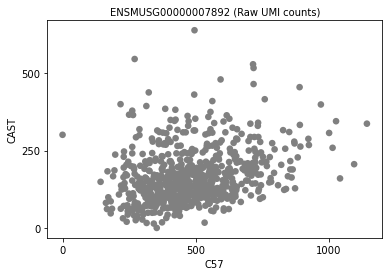

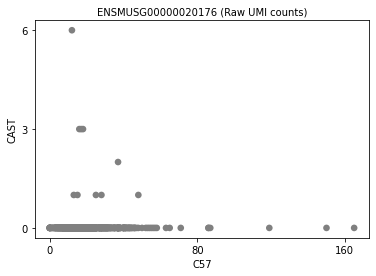

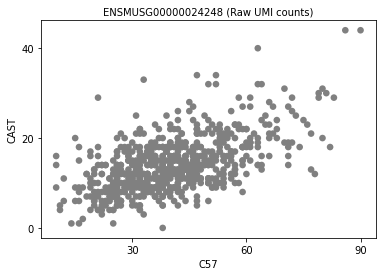

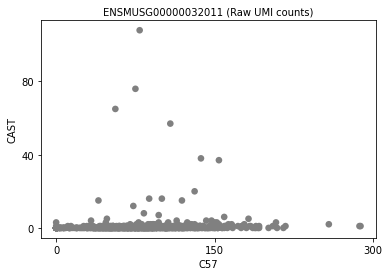

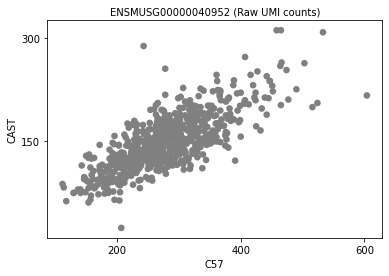

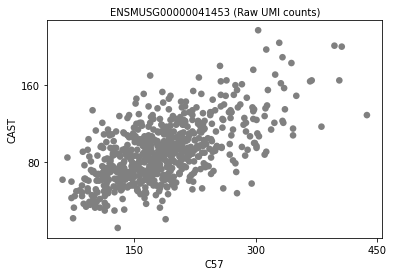

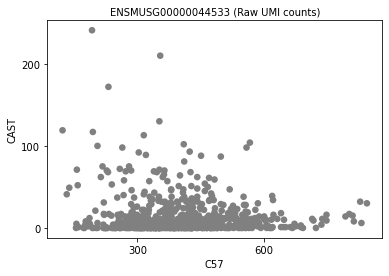

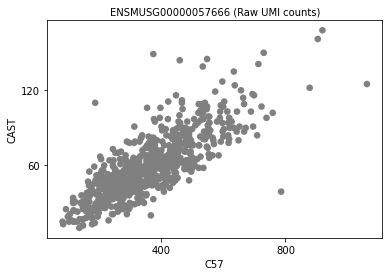

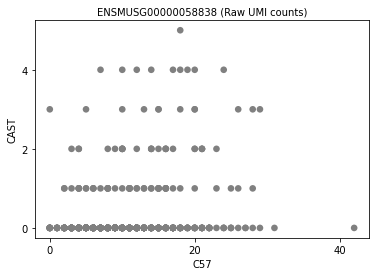

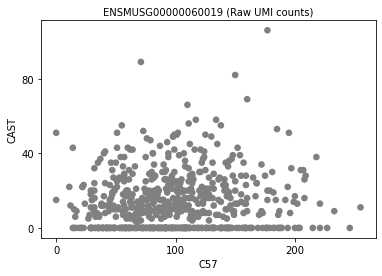

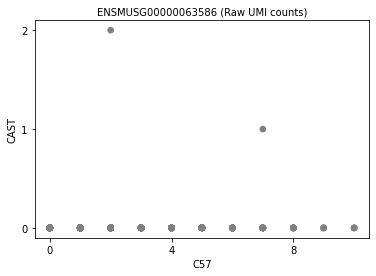

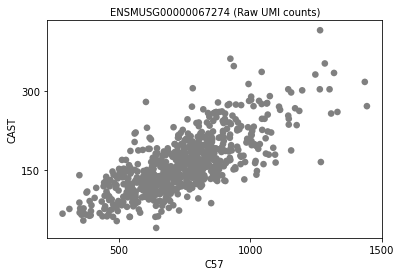

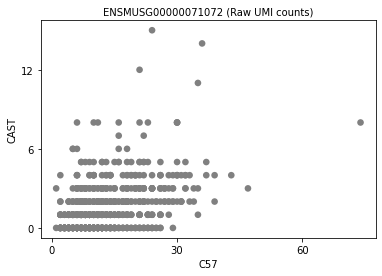

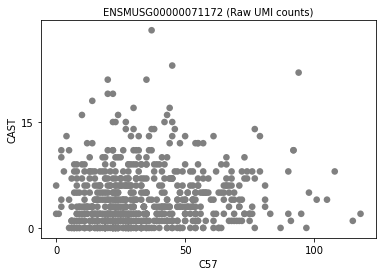

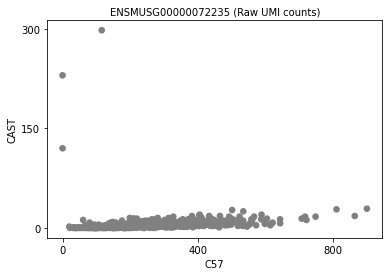

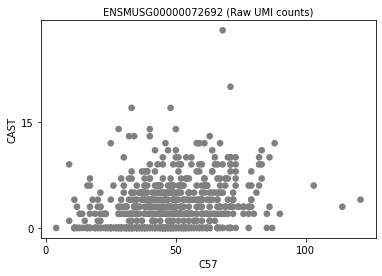

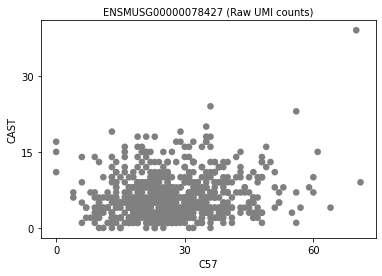

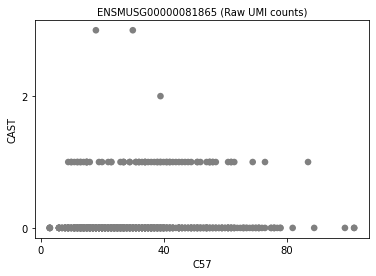

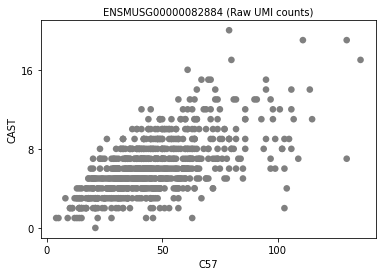

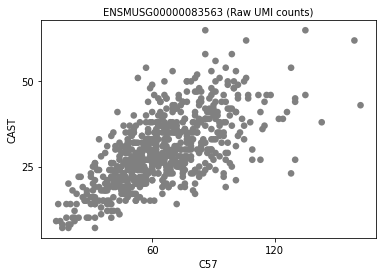

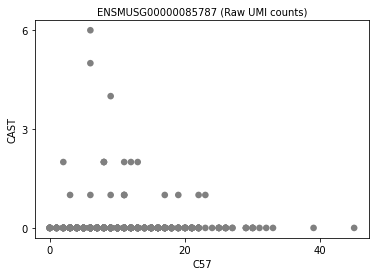

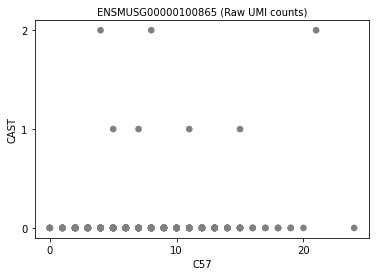

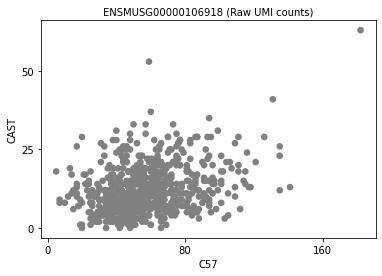

In [9]:
for x in df_class2_not_X.index:
    scv.pl.scatter(adata, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [13]:
df_class3 = df[(df['predict_label']==3)]
df_class3.head(10)

,predict_label,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot
ENSMUSG00000000001,3,Gnai3,3,autosome,nuclear,other protein
ENSMUSG00000000037,3,Scml2,X,X,nuclear,other protein
ENSMUSG00000000049,3,Apoh,11,autosome,nuclear,other protein
ENSMUSG00000000088,3,Cox5a,9,autosome,nuclear,other protein
ENSMUSG00000000093,3,Tbx2,11,autosome,nuclear,other protein
ENSMUSG00000000094,3,Tbx4,11,autosome,nuclear,other protein
ENSMUSG00000000126,3,Wnt9a,11,autosome,nuclear,other protein
ENSMUSG00000000154,3,Slc22a18,7,autosome,nuclear,other protein
ENSMUSG00000000171,3,Sdhd,9,autosome,nuclear,other protein
ENSMUSG00000000184,3,Ccnd2,6,autosome,nuclear,other protein


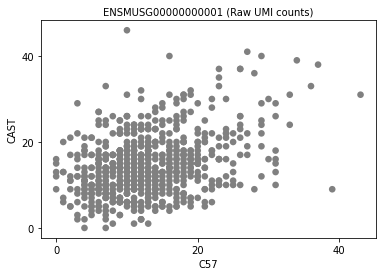

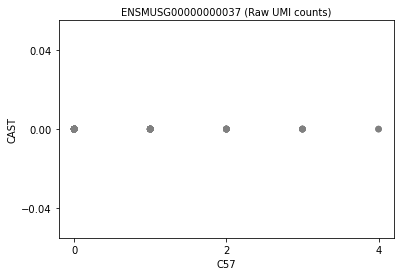

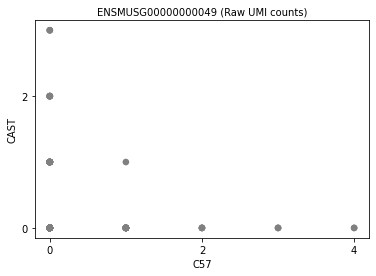

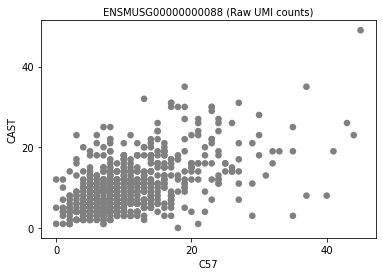

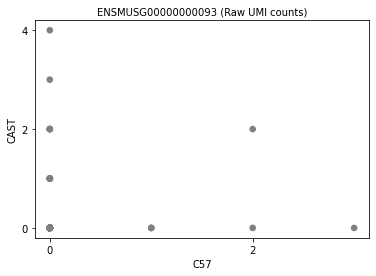

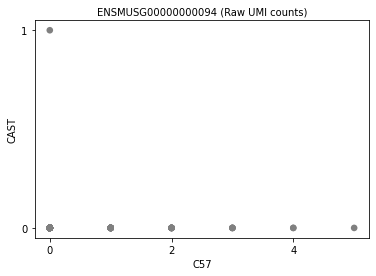

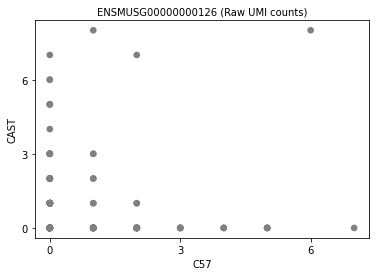

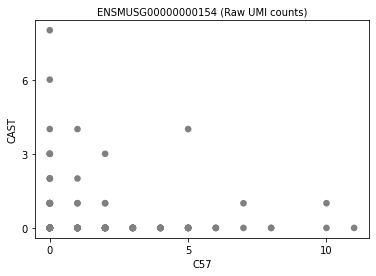

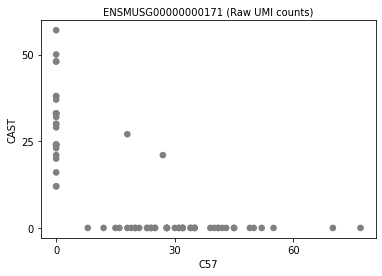

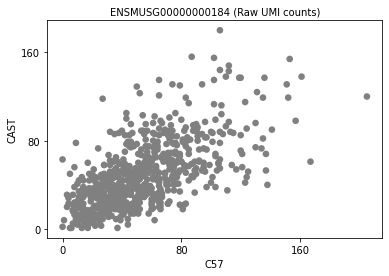

In [12]:
for x in df_class3.head(10).index:
    scv.pl.scatter(adata, x, normalize_data= False,
                       xlabel='C57', ylabel='CAST', title=f"{x} (Raw UMI counts)")

In [8]:
import anndata as ad
import scvelo as scv
import scipy as sp
from scipy import stats
from scipy import special
from scipy.stats import poisson,norm
from scipy.special import j_roots
from scipy.special import beta as beta_fun 
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns

import test.utils as test

In [12]:
scv.set_figure_params(dpi=100, color_map = 'viridis_r')
scv.settings.verbosity = 1
# sp.logging.print_header()

In [13]:
UMI_c57 = pd.read_csv('data_arme/F1_ref/umiSplit_c57.qc.csv', index_col=0)
UMI_cast = pd.read_csv('data_arme/F1_ref/umiSplit_cast.qc.csv', index_col=0)

UMI = UMI_c57 + UMI_cast

# transpose to ge n_cells x n_genes shape
UMI_c57_T = UMI_c57.transpose(copy=True)
UMI_cast_T = UMI_cast.transpose(copy=True)
UMI_T = UMI.transpose(copy=True)

adata = ad.AnnData(UMI_T)
adata.layers['spliced'] = UMI_c57_T
adata.layers['unspliced'] = UMI_cast_T

gtf = pd.read_csv("data/Mus_musculus.GRCm38.102.chr.gtf", sep='\t', skiprows=5, header=None)
gtf.columns = ['chr', 'database', 'type', 'start', 'end', '.', 'strand', '.', 'other']
gtf = gtf[gtf['type'] == "gene"]
gtf = gtf.reset_index()

dic_gene_names = {}
index = 0
for line in gtf['other'].tolist():
    line = line.split(';')
    dic_gene_names[line[0][9:-1]]= [gtf['chr'][index], line[2][12:-1]]
    index += 1
    
adata.var['gene_name'] = [dic_gene_names[x][1] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]
adata.var['chromosome'] = [dic_gene_names[x][0] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]


label = []
for chrom in adata.var['chromosome']:
    if chrom == "X":
        label.append('X')
    elif chrom == "Y":
        label.append('Y')
    else:
        label.append('autosome')
adata.var['autosomes'] = label

label = []
for chrom in adata.var['chromosome']:
    if chrom == "MT":
        label.append('MT')
    else:
        label.append('nuclear')
adata.var['nuclear'] = label

label = []
for genes in adata.var['gene_name']:
    if genes[:2]=='Rp':
        label.append('Ribosomal protein')
    else:
        label.append('other protein')
adata.var['Ribosomal_prot'] = label

In [14]:
adata

AnnData object with n_obs × n_vars = 682 × 23270
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot'
    layers: 'spliced', 'unspliced'

In [15]:
c57_1_sum = UMI_c57_T.sum(axis=0)
cast_2_sum = UMI_cast_T.sum(axis=0)
biallelic_sum = c57_1_sum + cast_2_sum

In [25]:
adata.var['sum_c57'] = c57_1_sum
adata.var['sum_cast'] = cast_2_sum
adata.var['sum_allele_1'] = c57_1_sum
adata.var['sum_allele_2'] = cast_2_sum
adata.var['sum_biallelic'] = biallelic_sum

In [26]:
adata.var['chromosome'] = adata.var['chromosome'].astype('str')


In [27]:
spliced_data = adata.to_df(layer="spliced").transpose()
unspliced_data = adata.to_df(layer="unspliced").transpose()
max_count_allele_1 = []
max_count_allele_2 = []
for x in adata.var.index:
    max_count_allele_1.append(np.max(spliced_data.loc[x]))
    max_count_allele_2.append(np.max(unspliced_data.loc[x]))
    
adata.var['max_count_allele_1'] = max_count_allele_1
adata.var['max_count_allele_2'] = max_count_allele_2

In [28]:
adata

AnnData object with n_obs × n_vars = 682 × 23270
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_c57', 'sum_cast', 'sum_biallelic', 'max_count_allele_1', 'max_count_allele_2', 'sum_allele_1', 'sum_allele_2'
    layers: 'spliced', 'unspliced'

In [29]:
adata.write('data/annotated_adata_without_filtering.h5ad')